# Import Python Libraries
## Libraries Used
##### Pandas
Data manipulation and analysis
##### MatPlotLib Pyplot
2D plotting
##### Numpy
Supports large, multi-dimensional arrays and matrix manipulation and high level mathematical functions on these arrays
##### Scipy Stats
Hypothesis testing

In [1]:
# Perform library imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

### Import Data Dictionaries to Convert Codes to Descriptions

##### Sources

Non-Profit Data - NCSS Data Archive:  https://nccs-data.urban.org/dd2.php?close=1&form=BMF+08/2016

Region Data - ...

##### Non-Profit Method
* Created text files in json format within Visual Studio for each Data Dictionary
* Saved files to Resources folder
* Used pandas library to read the files into dataframes

In [2]:
# Import Level1 Data Dictionary and display : NOTE - This is only a break out of Public Charities
file_Level1 = "./Resources/NCSSDataDictLevel1.txt"
dict_Level1 = pd.read_json(file_Level1)
dict_Level1

,Description1
O,Other Nonprofits
PC,Public Charity
PF,Private Foundation
U,Unknown


### Import IRS Business Master Files

##### Source
NCSS Data Archive
https://nccs-data.urban.org/data.php?ds=bmf

##### File
bmf.bm1812.csv

In [3]:
# specify file name
gov_data_file = "../../bookish-lamp/2018_BMF.csv"

# import file
gov_data = pd.read_csv(gov_data_file, low_memory=False)

# Display resulting dataframe header
gov_data.head()

,EIN,SEC_NAME,FRCD,SUBSECCD,TAXPER,ASSETS,INCOME,NAME,ADDRESS,CITY,...,LEVEL4,LEVEL1,NTMAJ10,MAJGRPB,LEVEL3,LEVEL2,NTMAJ12,NTMAJ5,FILER,ZFILER
0,19818,3514,60,3,NaN,NaN,NaN,PALMER SECOND BAPTIST CHURCH,1050 THORNDIKE ST,PALMER,...,X,PC,RE,X,RE,O,RE,OT,N,N
1,29215,NaN,60,3,NaN,NaN,NaN,ST GEORGE CATHEDRAL,523 E BROADWAY,SOUTH BOSTON,...,X,PC,RE,X,RE,O,RE,OT,N,N
2,260049,NaN,60,3,NaN,NaN,NaN,CORINTH BAPTIST CHURCH,PO BOX 92,HOSFORD,...,X,PC,RE,X,RE,O,RE,OT,N,N
3,490336,NaN,60,3,NaN,NaN,NaN,EASTSIDE BAPTIST CHURCH,PO BOX 296,LABELLE,...,X,PC,RE,X,RE,O,RE,OT,N,N
4,587764,NaN,60,3,NaN,NaN,NaN,IGLESIA BETHESDA INC,157 ANDOVER ST,LOWELL,...,X,PC,RE,X,RE,O,RE,OT,N,N


# Data Cleaning Phase
#### Review Raw Data and Eliminate Data not Required for Analysis and Junk Data
* IMPORTANT:  Read data dictionary and determine if some rows should be eliminated in step 1
  - TAXPER ending tax period for financial data - do we know these are all the same?  Do we care?
  - Out of Scope Flag - do we only want in scope data?
  - Reason why out of scope - do we care?
  - Filer: 99 filing w/in 2 years yes or no
  - ZFiler:  990 filing 0 dollars inc/assets w/in 2 years?
  - Etc.. need to review all codes and determine if some data should be removed by code (rows) first
* Remove unwanted columns - Do this step next to avoid deleting a row where one of the un-needed columns has invalid data and the columns needed have valid data
* Determine how many values in each column
* Remove NaN or missing values
* Removed unwanted rows (States that do not map to a region, Level1 O or U types)
* Other?

Questions
* Should we be using cTotRev and cAssets fields instead of ASSETS and INCOME?  The c fields are NCCS Financial Information, the two used so far are from Basic Info.  Are these the same?

In [4]:
# Select only the columns of data we need for analysis
gov_data = gov_data[["EIN","ASSETS","INCOME","NAME","STATE","LEVEL1"]]

In [5]:
# check the number of data rows per column
gov_data.count()

EIN       1499450
ASSETS    1223112
INCOME    1223112
NAME      1499450
STATE     1498426
LEVEL1    1499450
dtype: int64

In [6]:
# display the data read in
gov_data

,EIN,ASSETS,INCOME,NAME,STATE,LEVEL1
0,19818,NaN,NaN,PALMER SECOND BAPTIST CHURCH,MA,PC
1,29215,NaN,NaN,ST GEORGE CATHEDRAL,MA,PC
2,260049,NaN,NaN,CORINTH BAPTIST CHURCH,FL,PC
3,490336,NaN,NaN,EASTSIDE BAPTIST CHURCH,FL,PC
4,587764,NaN,NaN,IGLESIA BETHESDA INC,MA,PC
...,...,...,...,...,...,...
1499445,996089401,670570.0,160467.0,TOYO SAKUMOTO CHARITABLE TR,HI,PF
1499446,996165005,0.0,0.0,INDEPENDENT ORDER OF ODD FELLOWS,CA,O
1499447,998010224,737906.0,177689.0,HAWAII FOUNDATION FOR THE BLIND,HI,PF
1499448,998997790,0.0,0.0,CHAMPAIGN COUNTY EXTENSION EDUCATION FOUNDATION,IL,PC


In [7]:
# drop invalid rows and display
gov_data.dropna(axis=0, how='any', inplace=True)
gov_data

,EIN,ASSETS,INCOME,NAME,STATE,LEVEL1
18,10002847,0.0,0.0,HULLS COVE NEIGHBORHOOD ASSOCIATION,ME,PC
19,10011694,0.0,0.0,MASSACHUSETTS MODERATORS ASSOCIATION,MA,PC
20,10015091,52489.0,107989.0,HANOVER SOCCER CLUB INC,NJ,PC
21,10017496,233819.0,180773.0,AGAMENTICUS YACHT CLUB OF YORK,ME,PC
22,10018555,0.0,0.0,ALPHA TAU OMEGA FRATERNITY,ME,O
...,...,...,...,...,...,...
1499445,996089401,670570.0,160467.0,TOYO SAKUMOTO CHARITABLE TR,HI,PF
1499446,996165005,0.0,0.0,INDEPENDENT ORDER OF ODD FELLOWS,CA,O
1499447,998010224,737906.0,177689.0,HAWAII FOUNDATION FOR THE BLIND,HI,PF
1499448,998997790,0.0,0.0,CHAMPAIGN COUNTY EXTENSION EDUCATION FOUNDATION,IL,PC


In [8]:
# Determine if rows are even yet
gov_data.count()

EIN       1222273
ASSETS    1222273
INCOME    1222273
NAME      1222273
STATE     1222273
LEVEL1    1222273
dtype: int64

In [9]:
# identify the indices of rows we want to eliminate and display how many rows are found
indexNames = gov_data[gov_data["LEVEL1"]=="O"].index
len(indexNames)

330856

In [10]:
# drop the rows identified and show the resulting dataframe
gov_data.drop(indexNames, inplace=True)
gov_data.head()

,EIN,ASSETS,INCOME,NAME,STATE,LEVEL1
18,10002847,0.0,0.0,HULLS COVE NEIGHBORHOOD ASSOCIATION,ME,PC
19,10011694,0.0,0.0,MASSACHUSETTS MODERATORS ASSOCIATION,MA,PC
20,10015091,52489.0,107989.0,HANOVER SOCCER CLUB INC,NJ,PC
21,10017496,233819.0,180773.0,AGAMENTICUS YACHT CLUB OF YORK,ME,PC
33,10024155,0.0,0.0,BANGOR BAND,ME,PC


In [11]:
# identify the indices of rows we want to eliminate and display how many rows
indexNames = gov_data[gov_data["LEVEL1"]=="U"].index
len(indexNames)

9

In [12]:
# drop the rows identified and show the resulting dataframe
gov_data.drop(indexNames, inplace=True)
gov_data.head()

,EIN,ASSETS,INCOME,NAME,STATE,LEVEL1
18,10002847,0.0,0.0,HULLS COVE NEIGHBORHOOD ASSOCIATION,ME,PC
19,10011694,0.0,0.0,MASSACHUSETTS MODERATORS ASSOCIATION,MA,PC
20,10015091,52489.0,107989.0,HANOVER SOCCER CLUB INC,NJ,PC
21,10017496,233819.0,180773.0,AGAMENTICUS YACHT CLUB OF YORK,ME,PC
33,10024155,0.0,0.0,BANGOR BAND,ME,PC


In [13]:
# Determine the remaining count of rows and ensure our data set is full (no uneven row counts)
gov_data.count()

EIN       891408
ASSETS    891408
INCOME    891408
NAME      891408
STATE     891408
LEVEL1    891408
dtype: int64

# Review Basic Statistics of the Remaining Data
* Run basic statistics on the numeric columns


In [14]:
gov_data.describe()

,EIN,ASSETS,INCOME
count,8.914080e+05,8.914080e+05,8.914080e+05
mean,4.501007e+08,5.560271e+06,3.733421e+06
std,2.390812e+08,1.752903e+08,1.782037e+08
min,1.000285e+07,0.000000e+00,-3.050449e+07
25%,2.631331e+08,0.000000e+00,0.000000e+00
50%,4.527022e+08,3.790000e+03,4.860000e+03
75%,5.825405e+08,2.846955e+05,1.976800e+05
max,9.989978e+08,5.207875e+10,7.235283e+10


# Create a copy of our dataset at the State Level

In [15]:
# Create a copy of our data at the State Level
state_level1 = gov_data.copy()
state_level1

,EIN,ASSETS,INCOME,NAME,STATE,LEVEL1
18,10002847,0.0,0.0,HULLS COVE NEIGHBORHOOD ASSOCIATION,ME,PC
19,10011694,0.0,0.0,MASSACHUSETTS MODERATORS ASSOCIATION,MA,PC
20,10015091,52489.0,107989.0,HANOVER SOCCER CLUB INC,NJ,PC
21,10017496,233819.0,180773.0,AGAMENTICUS YACHT CLUB OF YORK,ME,PC
33,10024155,0.0,0.0,BANGOR BAND,ME,PC
...,...,...,...,...,...,...
1499443,996087839,10109.0,22000.0,KEIKI KOHOLA PROJECT,FL,PF
1499444,996088748,377564.0,64829.0,UNOYO KOJIMA TRUST,HI,PF
1499445,996089401,670570.0,160467.0,TOYO SAKUMOTO CHARITABLE TR,HI,PF
1499447,998010224,737906.0,177689.0,HAWAII FOUNDATION FOR THE BLIND,HI,PF


# Apply Region Data to the dataset
 
*


# Map Level 1 Labels (demo) and Save gov_data file (cleaned)

In [16]:
x_labels1 = gov_data["LEVEL1"].map(dict_Level1["Description1"])
x_labels1

gov_data.to_csv(index=False, path_or_buf="./Output/gov_data.csv")

# Calculate Statistics by Region: Public Charity vs Private Foundation
* Calculate count, median, mean, min, max, sem

In [17]:
# Create a dataframe that contains statistics about Income and Assets by State and Public Charity vs Private Foundation
state_level1 = state_level1.groupby(["STATE", "LEVEL1"], as_index=False).aggregate(
    {
        "INCOME":["mean", "sem", "count", "min", "max", "median"],
        "ASSETS":["mean", "sem", "count", "min", "max", "median"]
    }
)
# Display the resulting dataframe
state_level1

STATE LEVEL1        INCOME                                              \
                          mean           sem  count      min           max   
0      AA     PC  0.000000e+00           NaN      1      0.0  0.000000e+00   
1      AE     PC  7.268707e+05  6.340133e+05     21      0.0  1.329001e+07   
2      AK     PC  1.829941e+06  4.558748e+05   2788      0.0  8.759308e+08   
3      AK     PF  3.081849e+06  1.315174e+06    110      0.0  1.320134e+08   
4      AL     PC  1.275886e+06  2.325689e+05  10542      0.0  1.868716e+09   
..    ...    ...           ...           ...    ...      ...           ...   
112    WI     PF  1.612918e+06  2.897912e+05   2375  -6126.0  6.120344e+08   
113    WV     PC  2.150192e+06  4.157335e+05   5007      0.0  1.160407e+09   
114    WV     PF  8.708717e+05  1.505691e+05    353 -30617.0  2.874431e+07   
115    WY     PC  6.374540e+05  1.370712e+05   2399      0.0  2.690173e+08   
116    WY     PF  1.783573e+06  4.317716e+05    286      0.0  9.130250e+07   

                     ASSETS                                                    
       median          mean           sem  count  min           max    median  
0         0.0  0.000000e+00           NaN      1  0.0  0.000000e+00       0.0  
1         0.0  4.598413e+05  3.953394e+05     21  0.0  8.306423e+06       0.0  
2        23.0  2.672440e+06  4.970286e+05   2788  0.0  7.510723e+08       1.0  
3    101937.5  1.029920e+07  6.500200e+06    110  0.0  7.116767e+08  339912.5  
4         0.0  1.963709e+06  2.645897e+05  10542  0.0  1.193380e+09       0.0  
..        ...           ...           ...    ...  ...           ...       ...  
112  150243.0  4.229250e+06  5.070854e+05   2375  0.0  8.494265e+08  586919.0  
113       0.0  2.828019e+06  5.662661e+05   5007  0.0  1.690946e+09       0.0  
114  100762.0  2.889246e+06  4.668270e+05    353  0.0  1.143525e+08  477387.0  
115       0.0  1.383387e+06  3.336089e+05   2399  0.0  6.481097e+08       0.0  
116  138517.5  4.115691e+06  6.646454e+05    286  0.0  1.165312e+08  667078.5  

[117 rows x 14 columns]

# Remove any invalid rows (missing data or NaN)

In [18]:
# Remove invalid rows and display
state_level1.dropna(axis=0, how='any', inplace=True)
state_level1

STATE LEVEL1        INCOME                                              \
                          mean           sem  count      min           max   
1      AE     PC  7.268707e+05  6.340133e+05     21      0.0  1.329001e+07   
2      AK     PC  1.829941e+06  4.558748e+05   2788      0.0  8.759308e+08   
3      AK     PF  3.081849e+06  1.315174e+06    110      0.0  1.320134e+08   
4      AL     PC  1.275886e+06  2.325689e+05  10542      0.0  1.868716e+09   
5      AL     PF  9.482565e+05  1.277176e+05   1094      0.0  8.172473e+07   
..    ...    ...           ...           ...    ...      ...           ...   
112    WI     PF  1.612918e+06  2.897912e+05   2375  -6126.0  6.120344e+08   
113    WV     PC  2.150192e+06  4.157335e+05   5007      0.0  1.160407e+09   
114    WV     PF  8.708717e+05  1.505691e+05    353 -30617.0  2.874431e+07   
115    WY     PC  6.374540e+05  1.370712e+05   2399      0.0  2.690173e+08   
116    WY     PF  1.783573e+06  4.317716e+05    286      0.0  9.130250e+07   

                     ASSETS                                                    
       median          mean           sem  count  min           max    median  
1         0.0  4.598413e+05  3.953394e+05     21  0.0  8.306423e+06       0.0  
2        23.0  2.672440e+06  4.970286e+05   2788  0.0  7.510723e+08       1.0  
3    101937.5  1.029920e+07  6.500200e+06    110  0.0  7.116767e+08  339912.5  
4         0.0  1.963709e+06  2.645897e+05  10542  0.0  1.193380e+09       0.0  
5    102247.5  2.544636e+06  3.112035e+05   1094  0.0  1.770920e+08  382920.5  
..        ...           ...           ...    ...  ...           ...       ...  
112  150243.0  4.229250e+06  5.070854e+05   2375  0.0  8.494265e+08  586919.0  
113       0.0  2.828019e+06  5.662661e+05   5007  0.0  1.690946e+09       0.0  
114  100762.0  2.889246e+06  4.668270e+05    353  0.0  1.143525e+08  477387.0  
115       0.0  1.383387e+06  3.336089e+05   2399  0.0  6.481097e+08       0.0  
116  138517.5  4.115691e+06  6.646454e+05    286  0.0  1.165312e+08  667078.5  

[112 rows x 14 columns]

# Create Two Dataframes by Region:  Public Charities, Private Foundations

In [19]:
# Create a dataframe for Public Charities
state_PC = state_level1[state_level1["LEVEL1"] == "PC"]
state_PC = state_PC.set_index("STATE")
state_PC.head()

LEVEL1        INCOME                                                  \
                      mean            sem  count  min           max median   
STATE                                                                        
AE        PC  7.268707e+05  634013.321381     21  0.0  1.329001e+07    0.0   
AK        PC  1.829941e+06  455874.810920   2788  0.0  8.759308e+08   23.0   
AL        PC  1.275886e+06  232568.933587  10542  0.0  1.868716e+09    0.0   
AP        PC  2.762500e+04   11390.143450     20  0.0  1.552230e+05    0.0   
AR        PC  1.876654e+06  284764.630994   6770  0.0  1.106865e+09    0.0   

             ASSETS                                                  
               mean            sem  count  min           max median  
STATE                                                                
AE     4.598413e+05  395339.423854     21  0.0  8.306423e+06    0.0  
AK     2.672440e+06  497028.560455   2788  0.0  7.510723e+08    1.0  
AL     1.963709e+06  264589.666611  10542  0.0  1.193380e+09    0.0  
AP     1.085865e+04    5760.629510     20  0.0  1.006070e+05    0.0  
AR     2.701117e+06  396800.173488   6770  0.0  1.208407e+09    0.0

In [20]:
# Create a dataframe for Private Foundations
state_PF = state_level1[state_level1["LEVEL1"] == "PF"]
state_PF = state_PF.set_index("STATE")
state_PF.head()

LEVEL1        INCOME                                              \
                      mean           sem count       min           max   
STATE                                                                    
AK        PF  3.081849e+06  1.315174e+06   110       0.0  1.320134e+08   
AL        PF  9.482565e+05  1.277176e+05  1094       0.0  8.172473e+07   
AR        PF  8.221813e+06  5.319360e+06   445  -96310.0  2.328780e+09   
AZ        PF  1.269739e+06  2.103552e+05  1072       0.0  1.556742e+08   
CA        PF  4.119017e+06  4.322736e+05  9922 -771027.0  1.805736e+09   

                       ASSETS                                                   
         median          mean           sem count  min           max    median  
STATE                                                                           
AK     101937.5  1.029920e+07  6.500200e+06   110  0.0  7.116767e+08  339912.5  
AL     102247.5  2.544636e+06  3.112035e+05  1094  0.0  1.770920e+08  382920.5  
AR      68188.0  1.451183e+07  7.581225e+06   445  0.0  3.131554e+09  301791.0  
AZ      79397.5  4.117232e+06  7.517834e+05  1072  0.0  5.410745e+08  361349.0  
CA     102806.0  1.290699e+07  1.863713e+06  9922  0.0  1.039132e+10  415070.0

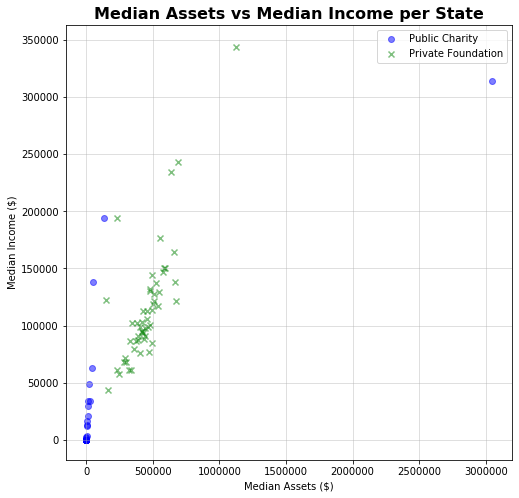

In [21]:
# Plot Median Income vs Median Assets per State
plt.figure(figsize=(8,8))
plt.scatter(state_PC["ASSETS"]["median"], state_PC["INCOME"]["median"], c="b", marker='o', alpha=0.5, label="Public Charity")
plt.scatter(state_PF["ASSETS"]["median"], state_PF["INCOME"]["median"], c="g", marker='x', alpha=0.5, label="Private Foundation")
plt.title(f'Median Assets vs Median Income per State', size=16, weight='bold')
plt.xlabel('Median Assets ($)')
plt.ylabel('Median Income ($)')
plt.grid(alpha=0.5)
plt.legend(loc="best")

# Save the image
plt.savefig("./Images/MedianAssetsvsMedianIncomebyState.png")
plt.show()

# Check Null Hypothesis
1) All states have the same number of Non-Profit Organizations (Public Charities & Private Foundations Total)

2) Median Income is the same for Public Charities and Private Foundations by State

3) Median Assets is the same for Public Charities and Private Foundations by State

4) Non-Profit count is the same for Public Charities and Private Foundations by State

# Create a function for repetitive testing
This function will do the following with two populations of data:
* Create a scatter plot
* Create a histogram
* Run a Student t-test with unequal variance
* Run an ANOVA

In [22]:
# Function to plot two populations
def displayData(index1, index2, population1, population2, label1, label2, title, xlabel, ylabel):
    
    # set the figure size
    plt.figure(figsize=(20,8))

    # Scatter Plot of Data
    plt.subplot(2,1,1)
    plt.scatter(index1, population1, marker='o', color='b', label=label1)
    plt.scatter(index2, population2, marker='x', color='g', label=label2)
    plt.title(title,color='k', size=14, weight='bold')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(loc="best")
    plt.grid(alpha=0.5)
    
    # Historgram Plot of Data
    plt.subplot(2, 1, 2)
    plt.hist(population1, 10, density=True, alpha=0.7, color='b', label=label1)
    plt.hist(population2, 10, density=True, alpha=0.7, color='g', label=label2)
    plt.axvline(population1.mean(), color='b', linestyle='dashed', linewidth=2)
    plt.axvline(population2.mean(), color='g', linestyle='dashed', linewidth=2)
    plt.xlabel(ylabel)
    plt.ylabel("Frequency")
    plt.legend(loc="best")
    plt.grid(alpha=0.5)
    
    # Save the Figure
    plt.savefig("./Images/" + title.replace(" ", "") + ".png")
    
    # Student t-test
    print('\033[1m' + "Student t-test with unequal variance" + '\033[0m')
    print(stats.ttest_ind(population1, population2, equal_var=False))
    
    # ANOVA test
    print('\033[1m' + '\nANOVA test' + '\033[0m')
    print(stats.f_oneway(population1, population2))
    
    return

# Null Hypothesis 1:  All states have the same number of Non-Profit Organizations
#### Where
Non-Profit in scope = Public Charities & Private Foundations

In [23]:
# Test with a Chi-square
stats.chisquare(gov_data["STATE"].value_counts())

Power_divergenceResult(statistic=1298643.0452923914, pvalue=0.0)

#### False:  All states do not have the same number of Non-Profit Organizations.

# Null Hypothesis 2:  Median Income is the same for Public Charities and Private Foundations by State

Student t-test with unequal variance
Ttest_indResult(statistic=-10.28675374061529, pvalue=9.814713780131195e-18)

ANOVA test
F_onewayResult(statistic=105.89219949166548, pvalue=8.40558929233472e-18)


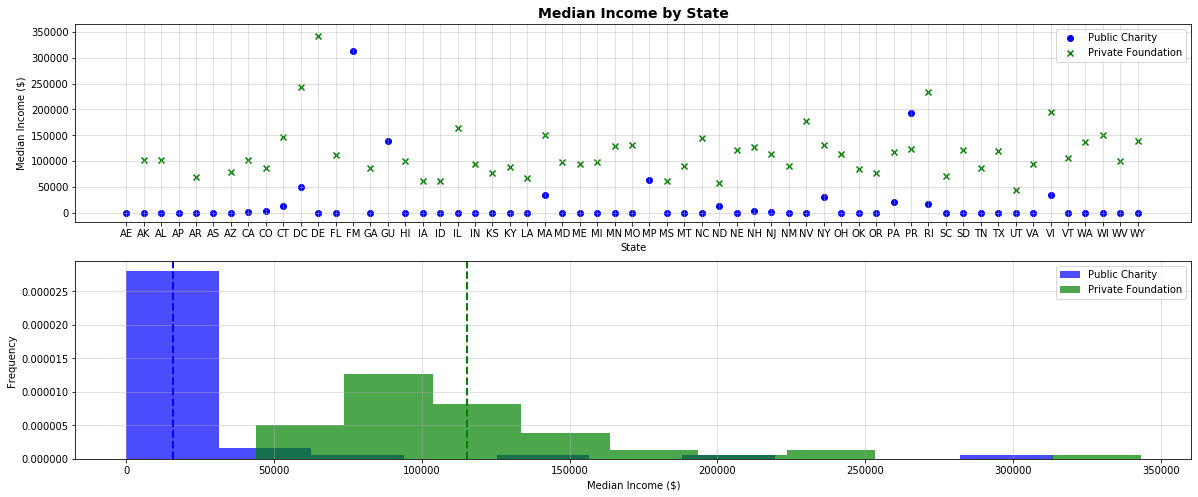

In [24]:
# Using the dataframes by State and type of Non-Profit, run tests
displayData(state_PC.index, state_PF.index, state_PC["INCOME"]["median"], state_PF["INCOME"]["median"],
            "Public Charity", "Private Foundation", "Median Income by State", "State", "Median Income ($)")

# Null Hypothesis 3:  Median Assets are the same for Public Charities and Private Foundations by State

Student t-test with unequal variance
Ttest_indResult(statistic=-7.075730950526343, pvalue=5.885042536354635e-10)

ANOVA test
F_onewayResult(statistic=46.26349437711653, pvalue=5.626218026605068e-10)


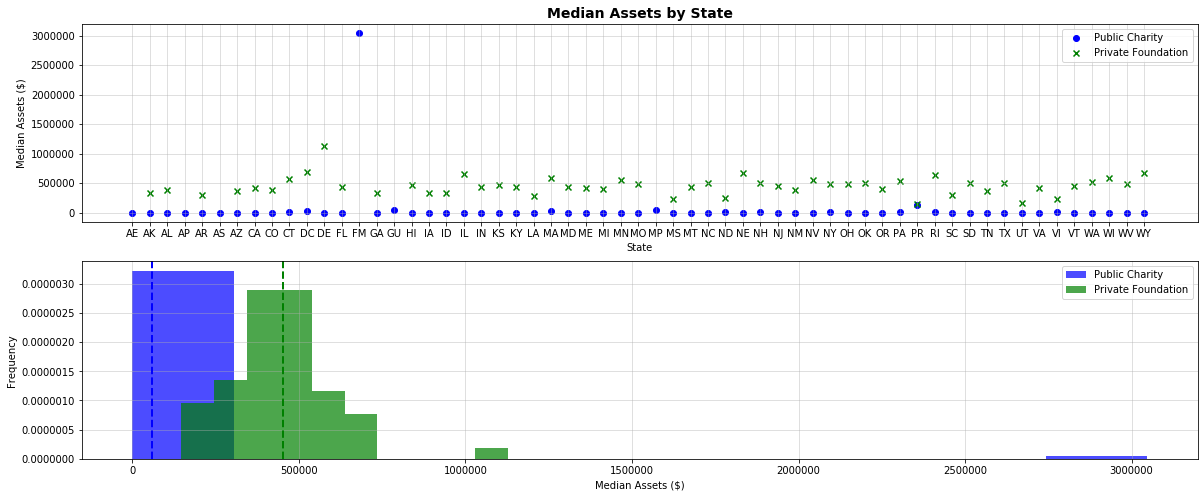

In [25]:
# Using the dataframes by State and type of Non-Profit, run tests
displayData(state_PC.index, state_PF.index, state_PC["ASSETS"]["median"], state_PF["ASSETS"]["median"],
            "Public Charity", "Private Foundation", "Median Assets by State", "State", "Median Assets ($)")

# Null Hypothesis 4:  Non-Profit count is the same for Public Charities and Private Foundations by State

Student t-test with unequal variance
Ttest_indResult(statistic=5.582478726833098, pvalue=5.873129855273572e-07)

ANOVA test
F_onewayResult(statistic=28.093942790877055, pvalue=6.011338962566393e-07)


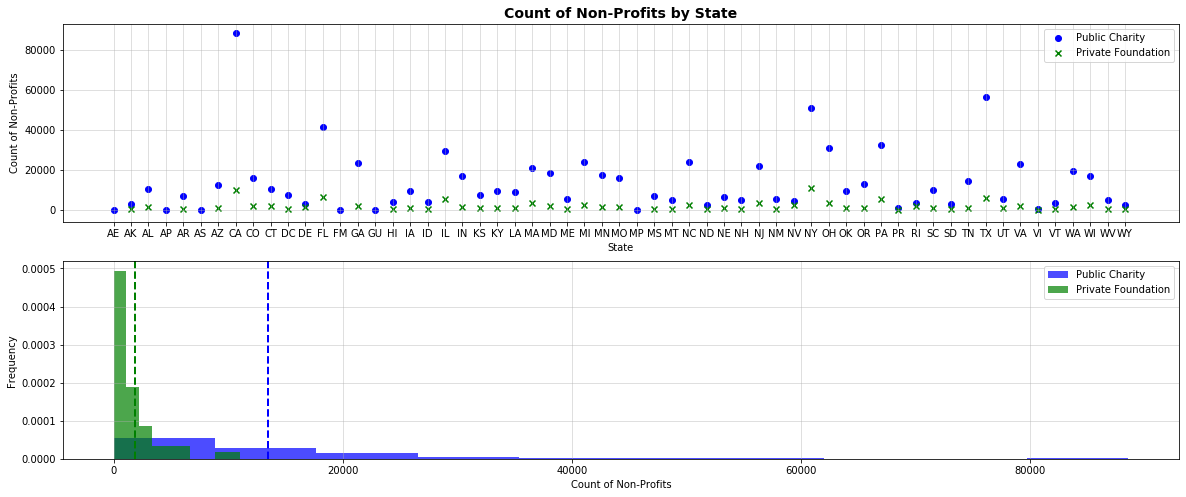

In [26]:
# Using the dataframes by State and type of Non-Profit, run tests
displayData(state_PC.index, state_PF.index, state_PC["ASSETS"]["count"], state_PF["ASSETS"]["count"],
            "Public Charity", "Private Foundation", "Count of Non-Profits by State", "State", "Count of Non-Profits")